In [1]:
#Dataset 
#https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime
import seaborn as sns

In [4]:
dataset = pd.read_csv("NetflixOriginals.csv", encoding="ISO-8859-1")
dataset.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


### Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur. Görselleştirme yapınız.

In [13]:
#Runtime'ı 100'den fazla olan filmleri filtreleme
dataset[(dataset["Runtime"] > 100)]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
5,Drive,Action,2019-11-01,147,3.5,Hindi
6,Leyla Everlasting,Comedy,2020-12-04,112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English
9,Sardar Ka Grandson,Comedy,2021-05-18,139,4.1,Hindi
11,The Call,Drama,2020-11-27,112,4.1,Korean
...,...,...,...,...,...,...
572,Disclosure: Trans Lives on Screen,Documentary,2020-06-19,107,8.2,English
575,The Three Deaths of Marisela Escobedo,Documentary,2020-10-14,109,8.2,Spanish
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English


In [27]:
runtime100 = dataset[(dataset["Runtime"] > 100)]

#Dillerin runtime değerlerinin ortalaması
sorted_runtime100 = runtime100.groupby("Language")["Runtime"].mean().sort_values(ascending = False)

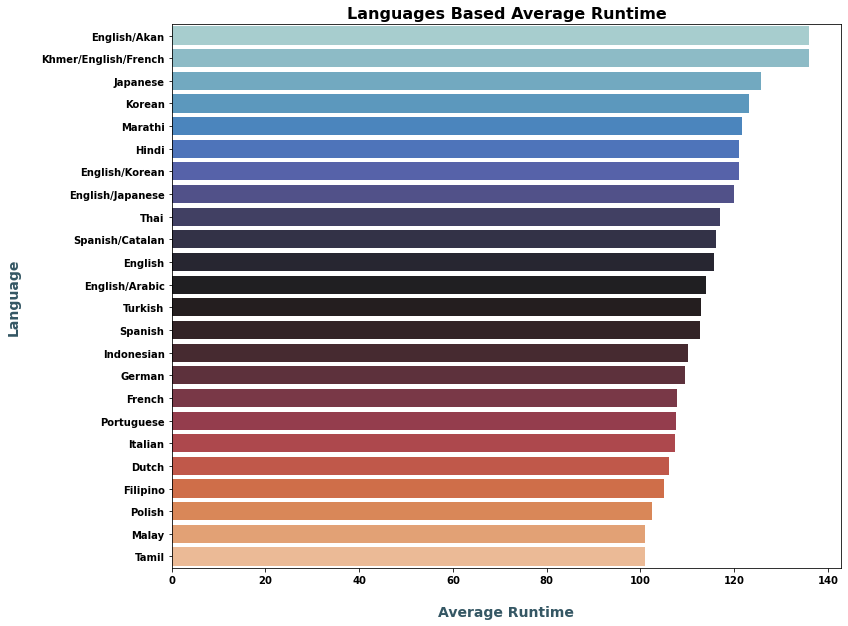

In [71]:
plt.figure(figsize=(12,10))
sns.barplot(x = "Runtime",
            y = "Language",
            data=sorted_runtime100.reset_index(),
            palette="icefire")
plt.title("Languages Based Average Runtime", weight="bold", fontsize=16)
plt.xlabel("Average Runtime", weight="bold", color="#355764", fontsize=14, labelpad = 20)
plt.ylabel("Language", weight="bold", color="#355764", fontsize=14, labelpad = 20)
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.show()

### 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz

In [52]:
type(dataset["Premiere"])

pandas.core.series.Series

In [53]:
#pandas.core.series.Series type'ını datetime'a çevirmek 
dataset["Premiere"] = pd.to_datetime(dataset["Premiere"])

In [54]:
dataset[(dataset["Genre"] == "Documentary") & (dataset["Premiere"] > "2019-01-01") & (dataset["Premiere"] < "2020-06-30")]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish
111,Ghosts of Sugar Land,Documentary,2019-10-16,21,5.5,English
151,One Take,Documentary,2020-06-18,85,5.7,Thai
263,A Tale of Two Kitchens,Documentary,2019-05-22,30,6.3,English/Spanish
286,The Legend of Cocaine Island,Documentary,2019-03-29,87,6.3,English
290,Travis Scott: Look Mom I Can Fly,Documentary,2019-08-28,85,6.3,English
295,Birders,Documentary,2019-09-25,37,6.4,English/Spanish


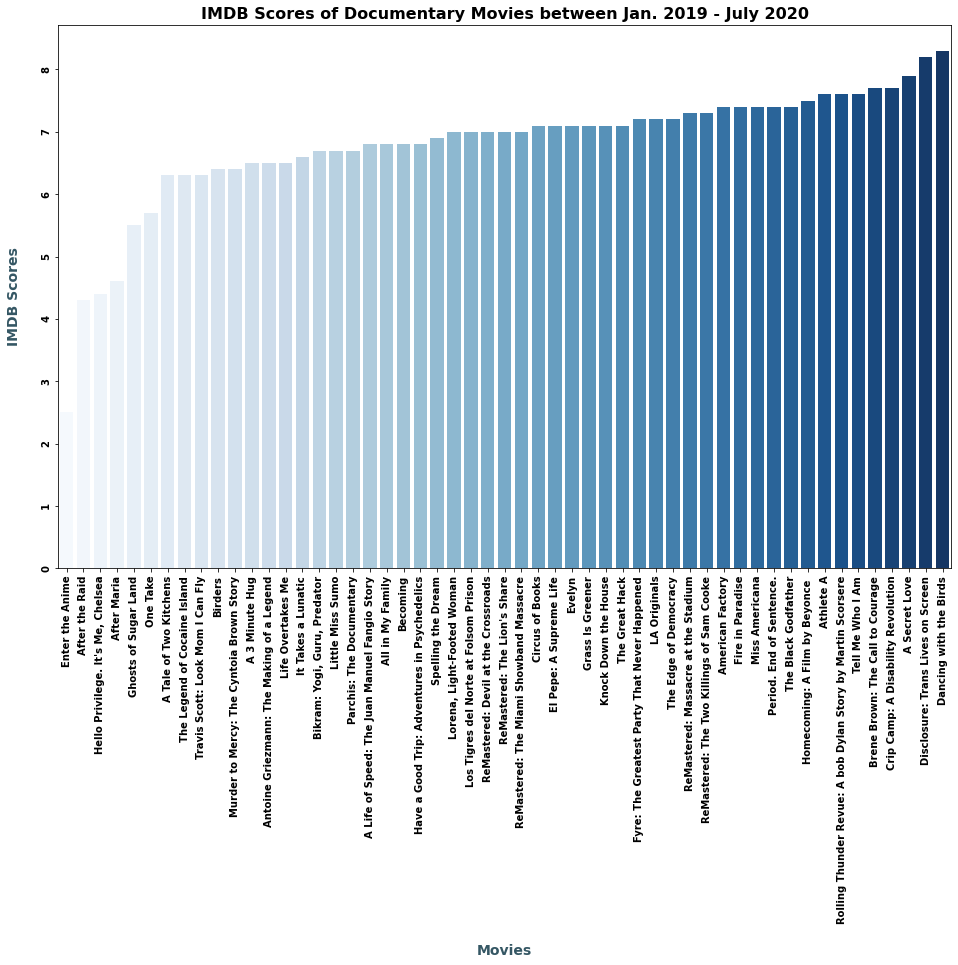

In [106]:
doc_premiere = dataset[(dataset["Genre"] == "Documentary") & (dataset["Premiere"] > "2019-01-01") & (dataset["Premiere"] < "2020-06-30")]

plt.figure(figsize=(16,10))
sns.barplot(x = "Title", y = "IMDB Score", data=doc_premiere, palette="Blues")
plt.title("IMDB Scores of Documentary Movies between Jan. 2019 - July 2020", weight="bold",fontsize=16)
plt.xlabel("Movies", weight="bold", color="#355764", fontsize=14, labelpad = 20)
plt.ylabel("IMDB Scores", weight="bold", color="#355764", fontsize=14, labelpad=20)
plt.xticks(rotation=90, fontsize=10, weight="bold")
plt.yticks(rotation=90, fontsize=10, weight="bold")
plt.show()

### İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?


In [97]:
dataset[(dataset["Language"] == "English")].sort_values(by="IMDB Score", ascending=False).head(1)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English


### 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [99]:
dataset[(dataset["Language"] == "Hindi")].head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
5,Drive,Action,2019-11-01,147,3.5,Hindi
9,Sardar Ka Grandson,Comedy,2021-05-18,139,4.1,Hindi
16,Ghost Stories,Horror anthology,2020-01-01,144,4.3,Hindi
23,The Girl on the Train,Thriller,2021-02-26,120,4.4,Hindi


In [100]:
hindi_movies = dataset[(dataset["Language"] == "Hindi")]

hindi_movies["Runtime"].mean()

115.78787878787878

### 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir?Görselleştirerek ifade ediniz.


In [108]:
dataset["Genre"].value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

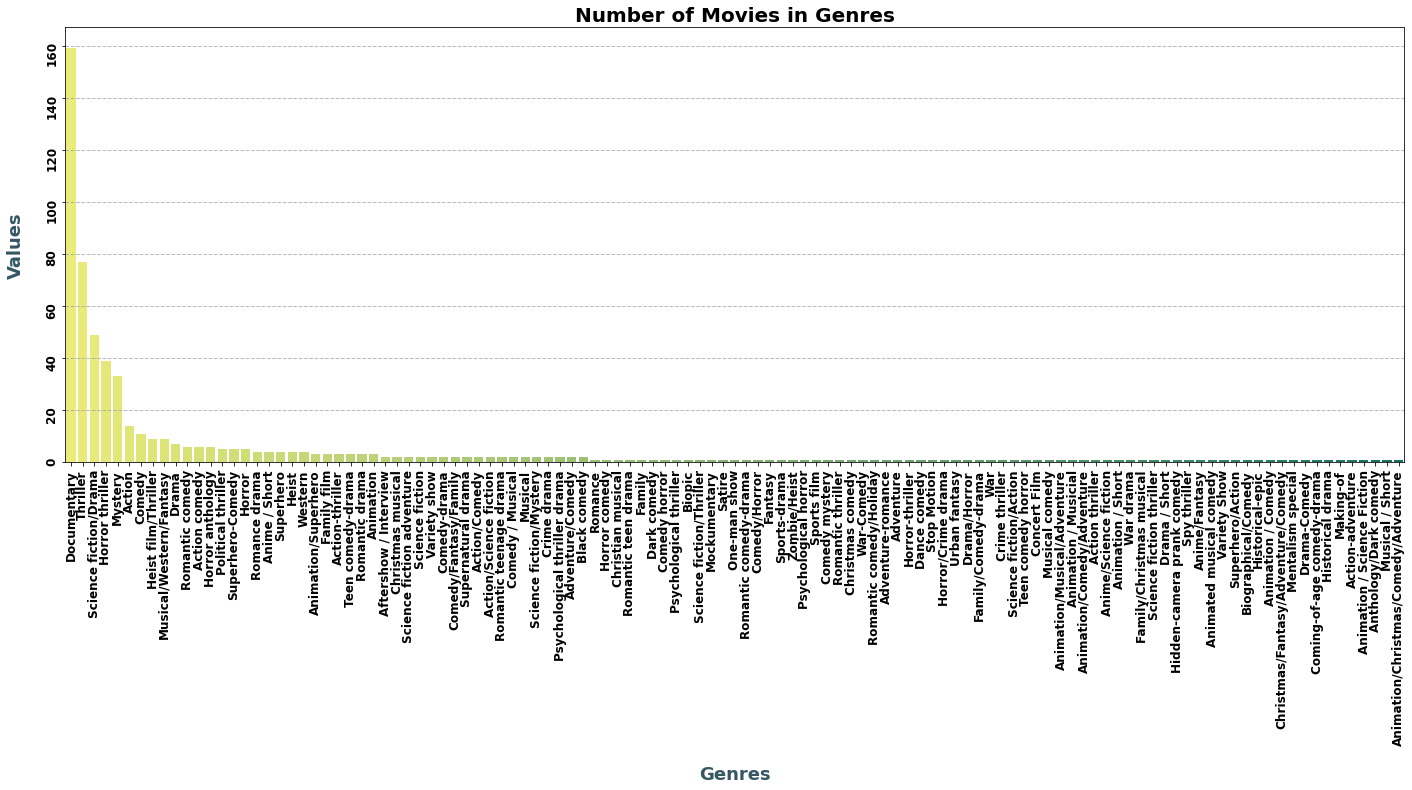

In [141]:
plt.figure(figsize = (24,8))
sns.barplot(x = dataset["Genre"].unique(), y= dataset["Genre"].value_counts(), palette= "summer_r")
plt.title("Number of Movies in Genres",
          fontsize= 20,
          fontweight = "bold")
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.xlabel("Genres", weight="bold", color="#355764", fontsize=18, labelpad=20)
plt.ylabel("Values", weight="bold", color="#355764", fontsize=18, labelpad=20)
plt.xticks(rotation=90, fontsize=12, weight="bold")
plt.yticks(rotation=90, fontsize=12, weight="bold")
plt.show()

### Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

In [119]:
dataset["Language"].value_counts().head(3)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

### IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [124]:
dataset.sort_values(by="IMDB Score", ascending = False).head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English
571,13th,Documentary,2016-10-07,100,8.2,English


### IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.


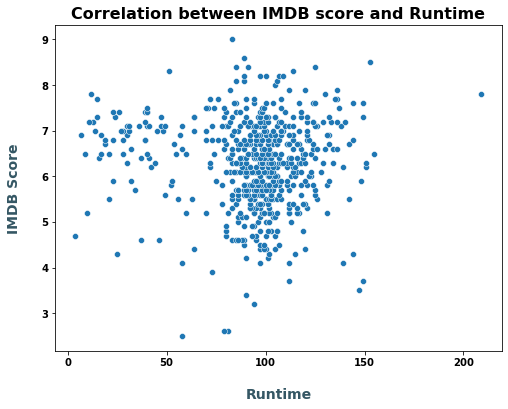

Korelasyon tablosuna baktığımızda zayıf pozitif bir korelasyon olduğu görülmektedir.


In [133]:
#IMDB Score ve Runtime arasındaki Korelasyon Grafiği
plt.figure(figsize = (8,6))

sns.scatterplot(data=dataset, x= "Runtime", y= "IMDB Score")
plt.title("Correlation between IMDB score and Runtime",
          fontsize= 16,
          fontweight = "bold")
plt.xlabel("Runtime", weight="bold", color="#355764", fontsize=14, labelpad=20)
plt.ylabel("IMDB Score", weight="bold", color="#355764", fontsize=14, labelpad=20)
plt.xticks(fontsize=10, weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.show()

print("Korelasyon tablosuna baktığımızda zayıf pozitif bir korelasyon olduğu görülmektedir.")

### IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

In [139]:
dataset.groupby("Genre")["IMDB Score"].max().sort_values(ascending = False).head(10)

Genre
Documentary                             9.0
One-man show                            8.5
Concert Film                            8.4
Animation/Christmas/Comedy/Adventure    8.2
Drama                                   7.9
Animation / Short                       7.8
Crime drama                             7.8
Musical / Short                         7.7
Making-of                               7.7
War drama                               7.7
Name: IMDB Score, dtype: float64

In [143]:
imdb_top10_genre = dataset.groupby("Genre")["IMDB Score"].max().sort_values(ascending = False).head(10)

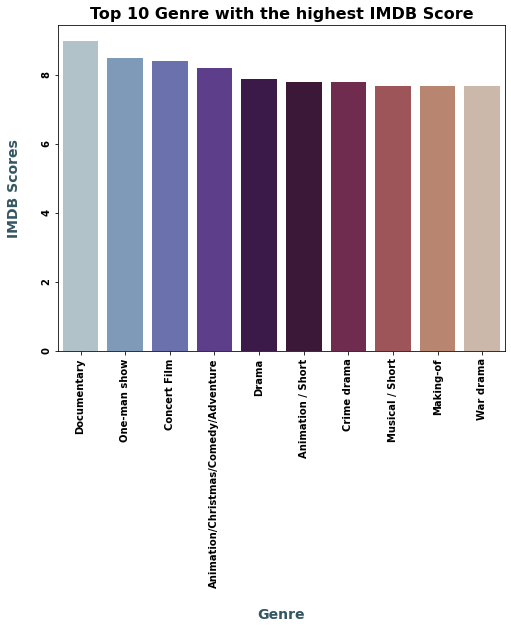

In [149]:
plt.figure(figsize=(8,6))
sns.barplot(x = "Genre", y = "IMDB Score", data=imdb_top10_genre.reset_index(), palette="twilight")
plt.title("Top 10 Genre with the highest IMDB Score", weight="bold",fontsize=16)
plt.xlabel("Genre", weight="bold", color="#355764", fontsize=14, labelpad = 20)
plt.ylabel("IMDB Scores", weight="bold", color="#355764", fontsize=14, labelpad=20)
plt.xticks(rotation=90, fontsize=10, weight="bold")
plt.yticks(rotation=90, fontsize=10, weight="bold")
plt.show()

### 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

In [151]:
dataset.sort_values(by="Runtime", ascending=False).head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,2019-11-27,209,7.8,English
328,Da 5 Bloods,War drama,2020-06-12,155,6.5,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
247,Citation,Drama,2020-11-06,151,6.2,English
284,The Forest of Love,Drama,2019-10-11,151,6.3,Japanese
509,Raat Akeli Hai,Thriller,2020-07-31,149,7.3,Hindi
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English
543,Ludo,Anthology/Dark comedy,2020-11-12,149,7.6,Hindi
194,Army of the Dead,Zombie/Heist,2021-05-21,148,5.9,English
5,Drive,Action,2019-11-01,147,3.5,Hindi


In [152]:
runtime_top10 = dataset.sort_values(by="Runtime", ascending=False).head(10)

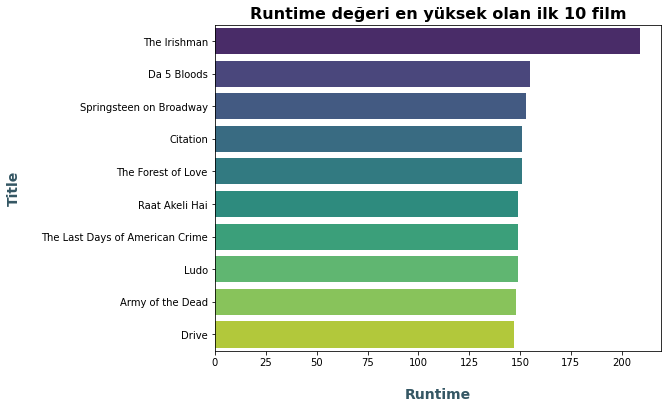

In [160]:
plt.figure(figsize = (8,6))
sns.barplot(x = "Runtime", y= "Title", data=runtime_top10, palette="viridis")
plt.title("Runtime değeri en yüksek olan ilk 10 film",
          fontsize= 16,
          fontweight = "bold")
plt.xlabel("Runtime", weight="bold", color="#355764", fontsize=14, labelpad = 20)
plt.ylabel("Title", weight="bold", color="#355764", fontsize=14, labelpad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

In [164]:
dataset["Premiere"].dt.year.value_counts()

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Premiere, dtype: int64

In [168]:
movies_year = dataset["Premiere"].dt.year.value_counts()

In [173]:
movies_year.keys()

Int64Index([2020, 2019, 2018, 2021, 2017, 2016, 2015, 2014], dtype='int64')

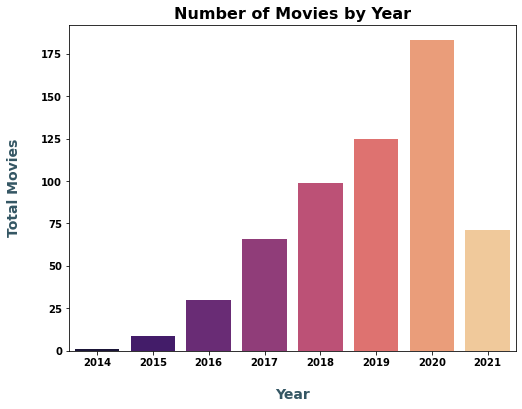

In [180]:
plt.figure(figsize = (8,6))
sns.barplot(x = movies_year.keys(), y= movies_year, palette="magma")
plt.title("Number of Movies by Year", fontsize= 16, fontweight = "bold")
plt.xlabel("Year", weight="bold", color="#355764", fontsize=14, labelpad = 20)
plt.ylabel("Total Movies", weight="bold", color="#355764", fontsize=14, labelpad=20)
plt.xticks(fontsize=10, weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.show()

### Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

In [184]:
dataset.groupby("Language")["IMDB Score"].mean().sort_values(ascending = True).head(10)

Language
Malay               4.200000
English/Japanese    4.400000
Norwegian           5.100000
Filipino            5.100000
Polish              5.166667
Thai                5.450000
Swedish             5.500000
Italian             5.542857
Spanish/Basque      5.600000
German              5.640000
Name: IMDB Score, dtype: float64

In [185]:
imdb_avg_langs = dataset.groupby("Language")["IMDB Score"].mean().sort_values(ascending = True)

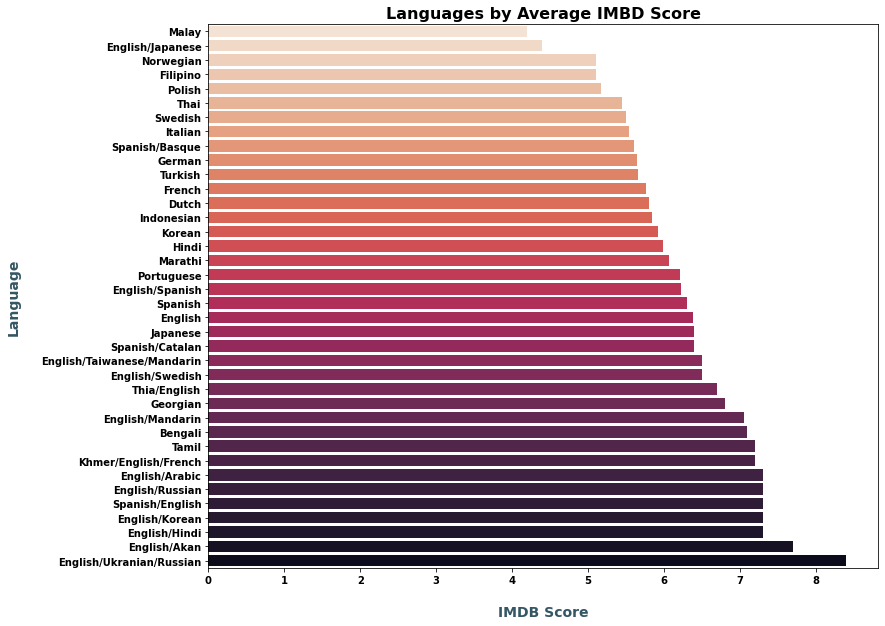

In [193]:
plt.figure(figsize = (12,10))
sns.barplot(x= imdb_avg_langs, y = imdb_avg_langs.keys(),  palette="rocket_r")
plt.title("Languages by Average IMBD Score", fontsize= 16, fontweight = "bold")
plt.xlabel("IMDB Score", weight="bold", color="#355764", fontsize=14, labelpad = 20)
plt.ylabel("Language", weight="bold", color="#355764", fontsize=14, labelpad=20)
plt.xticks(fontsize=10, weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.show()

###  Hangi yılın toplam "runtime" süresi en fazladır?

In [194]:
movies_by_years = dataset["Premiere"].dt.year

In [198]:
dataset.groupby(movies_by_years).sum().sort_values(by="Runtime", ascending=False).head(1)

,Runtime,IMDB Score
Premiere,,
2020,17384,1133.7


### Her bir dilin en fazla kullanıldığı "Genre" nedir?


In [208]:
dataset.groupby("Language")["Genre"].value_counts().sort_values(ascending=False)

Language  Genre                    
English   Documentary                  120
          Drama                         35
          Comedy                        30
          Romantic comedy               27
          Thriller                      14
                                      ... 
          Romantic thriller              1
          Satire                         1
          Science fiction adventure      1
          Science fiction/Action         1
Turkish   Romance                        1
Name: Genre, Length: 204, dtype: int64

### Veri setinde outlier veri var mıdır? Açıklayınız.

In [210]:
imdb_scores = dataset["IMDB Score"]

In [218]:
#imdb boxplot

#ilk çeyrek ve üçüncü çeyrek
Q1 = imdb_scores.quantile(0.25)
Q3 = imdb_scores.quantile(0.75)

#medyan
med = imdb_scores.median()

#IQR
IQR = Q3-Q1

#sınır değerler
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)

print(f"""
    Alt Sınır:{lower_bound},
    İlk çeyrek:{Q1},
    Medyan:{med},
    Üçüncü Çeyrek:{Q3},
    Üst Sınır:{upper_bound}""")


    Alt Sınır:3.7500000000000004,
    İlk çeyrek:5.7,
    Medyan:6.35,
    Üçüncü Çeyrek:7.0,
    Üst Sınır:8.95


In [230]:
outliners = imdb_scores[((imdb_scores <= lower_bound) | (imdb_scores >= upper_bound))]
print("Outliner veriler: \n", outliners)

Outliner veriler: 
 0      2.5
1      2.6
2      2.6
3      3.2
4      3.4
5      3.5
6      3.7
7      3.7
583    9.0
Name: IMDB Score, dtype: float64


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


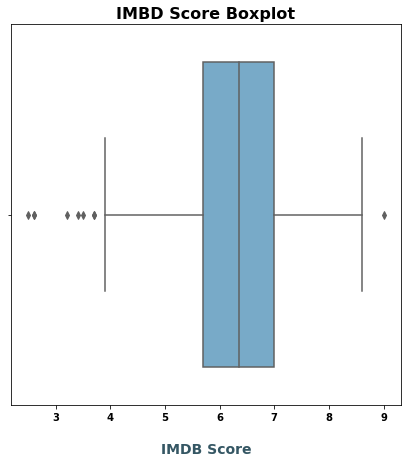

Total outliner values are 9


In [245]:
plt.figure(figsize=(7, 7))
sns.boxplot(imdb_scores, palette="Blues")
plt.title("IMBD Score Boxplot", fontsize= 16, fontweight = "bold")
plt.xlabel("IMDB Score", weight="bold", color="#355764", fontsize=14, labelpad=20)
plt.xticks(fontsize=10, weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.show()
print(f"Total outliner values are {len(outliners) }")

In [240]:
#runtime boxplot
runtimes = dataset["Runtime"]

#ilk çeyrek ve üçüncü çeyrek
Q1_run = runtimes.quantile(0.25)
Q3_run = runtimes.quantile(0.75)

#medyan
med_run = runtimes.median()

#IQR
IQR_run = Q3_run-Q1_run

#sınır değerler
upper_bound_run = Q3_run+(1.5*IQR_run)
lower_bound_run = Q1_run-(1.5*IQR_run)

print(f"""
    Alt Sınır:{lower_bound_run},
    İlk çeyrek:{Q1_run},
    Medyan:{med_run},
    Üçüncü Çeyrek:{Q3_run},
    Üst Sınır:{upper_bound_run}""")


    Alt Sınır:53.0,
    İlk çeyrek:86.0,
    Medyan:97.0,
    Üçüncü Çeyrek:108.0,
    Üst Sınır:141.0


In [242]:
outliners_runtime = runtimes[((runtimes <= lower_bound_run) | (runtimes >= upper_bound_run))]
print("Outliner veriler: \n", outliners_runtime)

Outliner veriler: 
 5      147
7      149
15      25
16     144
30      37
      ... 
552     15
560     12
561    209
577     51
581    153
Name: Runtime, Length: 76, dtype: int64


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


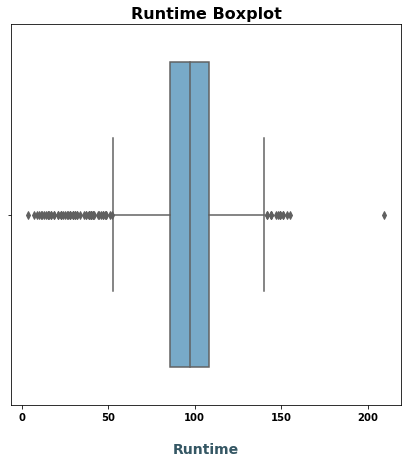

Total outliner values are 76


In [244]:
plt.figure(figsize=(7, 7))
sns.boxplot(runtimes, palette="Blues")
plt.title("Runtime Boxplot", fontsize= 16, fontweight = "bold")
plt.xlabel("Runtime", weight="bold", color="#355764", fontsize=14, labelpad=20)
plt.xticks(fontsize=10, weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.show()
print(f"Total outliner values are {len(outliners_runtime) }")